dS/dt=-bSI+gI, dI/dt=bSI-gI (uso b para beta y g para gamma)

In [1]:
from sympy import *
from sympy.abc import S,I,t,b,g

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

In [3]:
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(S, 0), (g/b, I)]
⎡-I⋅b  -S⋅b + g⎤
⎢              ⎥
⎣I⋅b   S⋅b - g ⎦


In [4]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1.eigenvals())
pprint(Jc1.eigenvects())
Jc2=J.subs([(S,g/b),(I,I)])
pprint(Jc2.eigenvals())
pprint(Jc2.eigenvects())

{0: 1, S⋅b - g: 1}
⎡⎛      ⎡⎡1⎤⎤⎞  ⎛            ⎡⎡-1⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢ ⎥⎥⎟, ⎜S⋅b - g, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠  ⎝            ⎣⎣1 ⎦⎦⎠⎦
{0: 1, -I⋅b: 1}
⎡⎛      ⎡⎡0⎤⎤⎞  ⎛         ⎡⎡-1⎤⎤⎞⎤
⎢⎜0, 1, ⎢⎢ ⎥⎥⎟, ⎜-I⋅b, 1, ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝         ⎣⎣1 ⎦⎦⎠⎦


Los puntos criticos son no hiperbolicos, por lo que no cumplen el teorema de Hartmann.

Analsis de Bifurcaciones

El sistema tiene dos puntos criticos, (S,0) y (gamma/beta,I), el primer punto no depende de gamma ni beta, por lo que no cambia. 

a) beta<0, gamma<0 (gamma=g, beta=b)

In [3]:
b=-b
g=-g
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(S, 0), (g/b, I)]
⎡I⋅b   S⋅b - g ⎤
⎢              ⎥
⎣-I⋅b  -S⋅b + g⎦


In [4]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1.eigenvals())
#pprint(Jc1.eigenvects())
Jc2=J.subs([(S,g/b),(I,I)])
pprint(Jc2.eigenvals())
#pprint(Jc2.eigenvects())

{0: 1, -S⋅b + g: 1}
{0: 1, I⋅b: 1}


Los puntos criticos (S, 0) y (g/b, I) son no hiperbolicos.

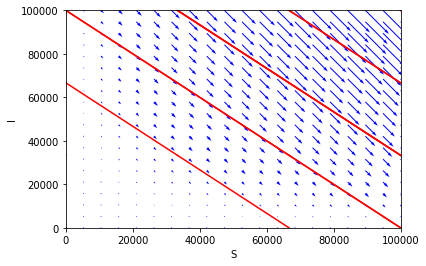

In [3]:
#sistema dS/dt=-b*S*I+g*I, dI/dt=b*S*I-g*I con beta<0, gamma<0
b=-1
g=-1
def dx_dt(x,t):
    return [ -b*x[0]*x[1]+g*x[1] , b*x[0]*x[1]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X*Y+g*Y
v=b*X*Y-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISinf01.pdf")
plt.show()

b) beta<0, gamma>0 (gamma=g, beta=b)

In [6]:
b=-b
g=g
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(S, 0), (-g/b, I)]
⎡I⋅b   S⋅b + g ⎤
⎢              ⎥
⎣-I⋅b  -S⋅b - g⎦


In [7]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1.eigenvals())
#pprint(Jc1.eigenvects())
Jc2=J.subs([(S,-g/b),(I,I)])
pprint(Jc2.eigenvals())
#pprint(Jc2.eigenvects())

{0: 1, -S⋅b - g: 1}
{0: 1, I⋅b - 2⋅g: 1}


Los puntos criticos (S, 0) y (-g/b, I) son no hiperbolicos.

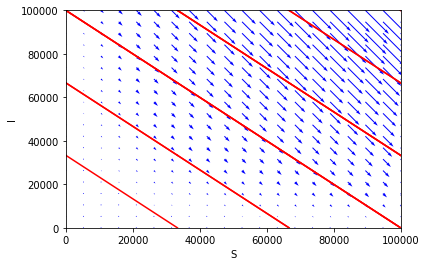

In [8]:
#sistema dS/dt=-b*S*I+g*I, dI/dt=b*S*I-g*I con beta<0, gamma>0
b=-1
g=1
def dx_dt(x,t):
    return [ -b*x[0]*x[1]+g*x[1] , b*x[0]*x[1]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X*Y+g*Y
v=b*X*Y-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISinf02.pdf")
plt.show()

c) beta<0, gamma=0 (gamma=g, beta=b)

In [9]:
b=-b
g=0
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(0, I), (S, 0)]
⎡-I  -S⎤
⎢      ⎥
⎣I   S ⎦


In [10]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1.eigenvals())
#pprint(Jc1.eigenvects())
Jc2=J.subs([(S,0),(I,I)])
pprint(Jc2.eigenvals())
#pprint(Jc2.eigenvects())

{0: 1, S: 1}
{0: 1, -I: 1}


Los puntos criticos (S, 0) y (0, I) son no hiperbolicos.

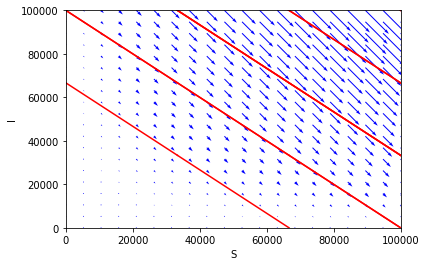

In [11]:
#sistema dS/dt=-b*S*I+g*I, dI/dt=b*S*I-g*I con beta<0, gamma=0
b=-1
g=0
def dx_dt(x,t):
    return [ -b*x[0]*x[1]+g*x[1] , b*x[0]*x[1]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X*Y+g*Y
v=b*X*Y-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISinf03.pdf")
plt.show()

d) beta>0, gamma<0 (gamma=g, beta=b)

In [3]:
b=b
g=-g
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(S, 0), (-g/b, I)]
⎡-I⋅b  -S⋅b - g⎤
⎢              ⎥
⎣I⋅b   S⋅b + g ⎦


In [4]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1.eigenvals())
#pprint(Jc1.eigenvects())
Jc2=J.subs([(S,-g/b),(I,I)])
pprint(Jc2.eigenvals())
#pprint(Jc2.eigenvects())

{0: 1, S⋅b + g: 1}
{0: 1, -I⋅b + 2⋅g: 1}


Los puntos criticos (S, 0) y (-g/b, I) son no hiperbolicos.

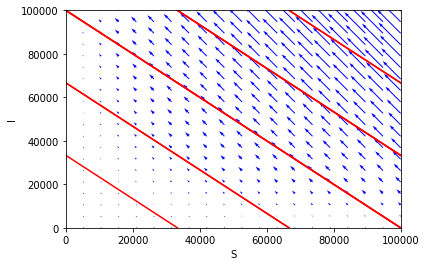

In [6]:
#sistema dS/dt=-b*S*I+g*I, dI/dt=b*S*I-g*I con beta>0, gamma<0
b=1
g=-1
def dx_dt(x,t):
    return [ -b*x[0]*x[1]+g*x[1] , b*x[0]*x[1]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X*Y+g*Y
v=b*X*Y-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISinf04.pdf")
plt.show()

e) beta>0, gamma>0 (gamma=g, beta=b)

In [3]:
b=b
g=g
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(S, 0), (g/b, I)]
⎡-I⋅b  -S⋅b + g⎤
⎢              ⎥
⎣I⋅b   S⋅b - g ⎦


In [4]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1.eigenvals())
#pprint(Jc1.eigenvects())
Jc2=J.subs([(S,g/b),(I,I)])
pprint(Jc2.eigenvals())
#pprint(Jc2.eigenvects())

{0: 1, S⋅b - g: 1}
{0: 1, -I⋅b: 1}


Los puntos criticos (S, 0) y (g/b, I) son no hiperbolicos.

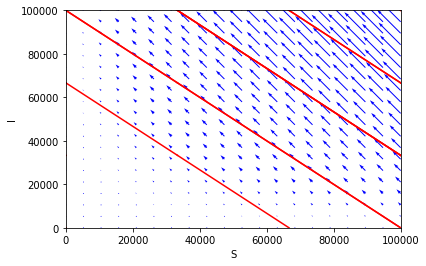

In [5]:
#sistema dS/dt=-b*S*I+g*I, dI/dt=b*S*I-g*I con beta>0, gamma>0
b=1
g=1
def dx_dt(x,t):
    return [ -b*x[0]*x[1]+g*x[1] , b*x[0]*x[1]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X*Y+g*Y
v=b*X*Y-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISinf05.pdf")
plt.show()

f) beta>0, gamma=0 (gamma=g, beta=b)

In [6]:
b=b
g=0
#puntos criticos
P=-b*S*I+g*I
Q=b*S*I-g*I
#establecer P(S,I)=0 y Q(S,I)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),S,I))
#matriz Jacobiana
J11=diff(P,S)
J12=diff(P,I)
J21=diff(Q,S)
J22=diff(Q,I)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

[(0, I), (S, 0)]
⎡-I  -S⎤
⎢      ⎥
⎣I   S ⎦


In [7]:
#J en el punto critico
Jc1=J.subs([(S,S),(I,0)])
pprint(Jc1.eigenvals())
#pprint(Jc1.eigenvects())
Jc2=J.subs([(S,0),(I,I)])
pprint(Jc2.eigenvals())
#pprint(Jc2.eigenvects())

{0: 1, S: 1}
{0: 1, -I: 1}


Los puntos criticos (S, 0) y (0, I) son no hiperbolicos.

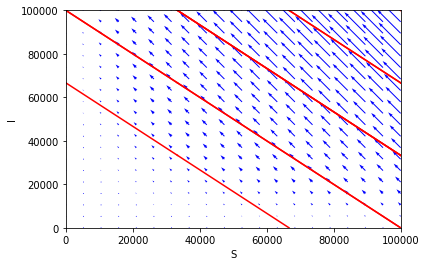

In [8]:
#sistema dS/dt=-b*S*I+g*I, dI/dt=b*S*I-g*I con beta>0, gamma=0
b=1
g=0
def dx_dt(x,t):
    return [ -b*x[0]*x[1]+g*x[1] , b*x[0]*x[1]-g*x[1] ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(0,100000,4)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('S',fontsize=10)
plt.ylabel('I',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(0,100000)
plt.ylim(0,100000)
#campo vectorial
X,Y=np.mgrid[0:100000:20j,0:100000:20j]
u=-b*X*Y+g*Y
v=b*X*Y-g*Y
pl.quiver(X,Y,u,v,color='b')
plt.savefig("SISinf06.pdf")
plt.show()

f) beta=0, gamma (en este caso no se como explicar que pasa con el punto critico, pero si se grafica sale en el eje x)